<a href="https://colab.research.google.com/github/girija2204/DLTopics/blob/master/OCR_using_PyTesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! apt install tesseract-ocr
! apt install libtesseract-dev

In [ ]:
! pip install Pillow
! pip install pytesseract

In [37]:
import pytesseract
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def url_to_img(url):
  image = None
  response = urllib.request.urlopen(url)
  img_array = np.asarray(bytearray(response.read()))
  image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
  return image

In [41]:
images = [url_to_img(image_url) for image_url in ["https://i.imgur.com/9C5Q9Rt.jpg","https://i.pinimg.com/736x/0f/50/54/0f50543167ea6284153c6282918715c4.jpg","https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/ReceiptSwiss.jpg/170px-ReceiptSwiss.jpg"]]

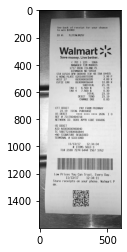

In [65]:
image = url_to_img("https://i.imgur.com/9C5Q9Rt.jpg")
plt.imshow(image)

In [43]:
images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]

In [ ]:
fig, axs = plt.subplots(nrows=len(images),ncols=1,figsize=(20,20))
for index, image in enumerate(images):
  axs[index].imshow(image, cmap='gray')

In [ ]:
print(pytesseract.image_to_string(image))

In [ ]:
print(pytesseract.image_to_boxes(image))

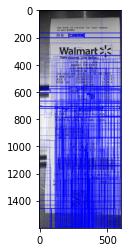

In [63]:
# Detecting characters
img_height, img_weight, _ = image.shape
boxes = pytesseract.image_to_boxes(image)
for box in boxes.splitlines():
  box_list = box.split(" ")
  x,y,w,h = int(box_list[1]),int(box_list[2]),int(box_list[3]),int(box_list[4])
  cv2.rectangle(image, (x,img_height-y),(w,img_height-h),(0,0,255),3)
  cv2.putText(image,box_list[0], (x,img_height-h), cv2.FONT_HERSHEY_COMPLEX, 1, (50,50,250),2)
plt.imshow(image)

In [ ]:
print(pytesseract.image_to_data(image))

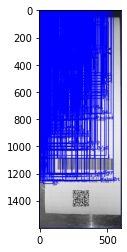

In [75]:
boxes = pytesseract.image_to_data(image)
for index, box in enumerate(boxes.splitlines()):
  if index != 0:
    box_list = box.split()
    if len(box_list) == 12:
      x,y,w,h = int(box_list[6]),int(box_list[7]),int(box_list[8]),int(box_list[9])
      cv2.rectangle(image, (x,y), (w,h), (0,0,255),3)
      cv2.putText(image, box_list[11], (x,y),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,250),3)
  plt.imshow(image)